In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [76]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [77]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [78]:
train.shape

(8523, 12)

In [79]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [80]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [81]:
sum(train.duplicated()) #Check for duplicated data

0

In [82]:
#Check for missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [83]:
train['Item_Weight'], train['Outlet_Size'].unique()

(0        9.300
 1        5.920
 2       17.500
 3       19.200
 4        8.930
          ...  
 8518     6.865
 8519     8.380
 8520    10.600
 8521     7.210
 8522    14.800
 Name: Item_Weight, Length: 8523, dtype: float64,
 array(['Medium', nan, 'High', 'Small'], dtype=object))

In [84]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)

In [85]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [86]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [87]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [88]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [89]:
#As all the above concludes the same thing we'll merge them into one
train.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'}}, inplace= True)

In [90]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [91]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# EDA

In [92]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

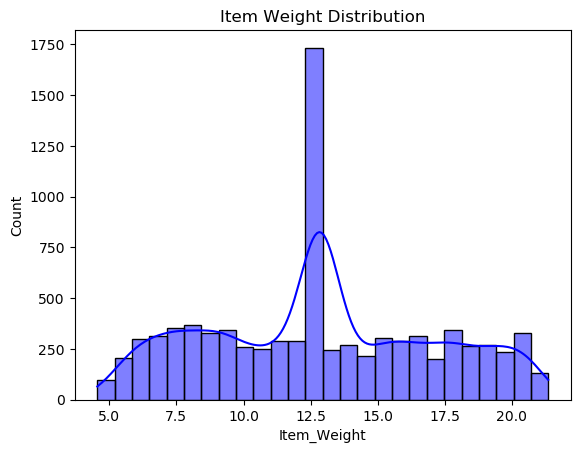

In [93]:
sns.histplot(data= train, x= 'Item_Weight', kde=True, color='blue')
plt.title("Item Weight Distribution")
plt.show()

In [94]:
item_fat_content = train.groupby("Item_Fat_Content").agg({"Item_Identifier":"count"})

In [95]:
item_fat_content

,Item_Identifier
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [96]:
item_fat_content['precentage'] = (item_fat_content['Item_Identifier'] / item_fat_content['Item_Identifier'].sum())*100

item_fat_content

,Item_Identifier,precentage
Item_Fat_Content,,
Low Fat,5517,64.730729
Regular,3006,35.269271


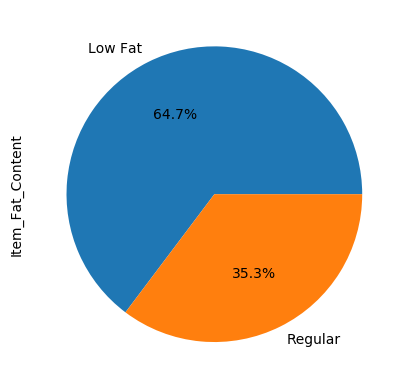

In [97]:
train['Item_Fat_Content'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

In [98]:
item_type_table = train.groupby('Item_Type').agg({'Item_Identifier':'count'})
item_type_table['percentage'] = (item_type_table['Item_Identifier'] / item_type_table['Item_Identifier'].sum())*100
item_type_table.sort_values(by='percentage')

,Item_Identifier,percentage
Item_Type,,
Seafood,64,0.750909
Breakfast,110,1.290625
Starchy Foods,148,1.736478
Others,169,1.982870
Hard Drinks,214,2.510853
Breads,251,2.944972
Meat,425,4.986507
Soft Drinks,445,5.221166
Health and Hygiene,520,6.101138


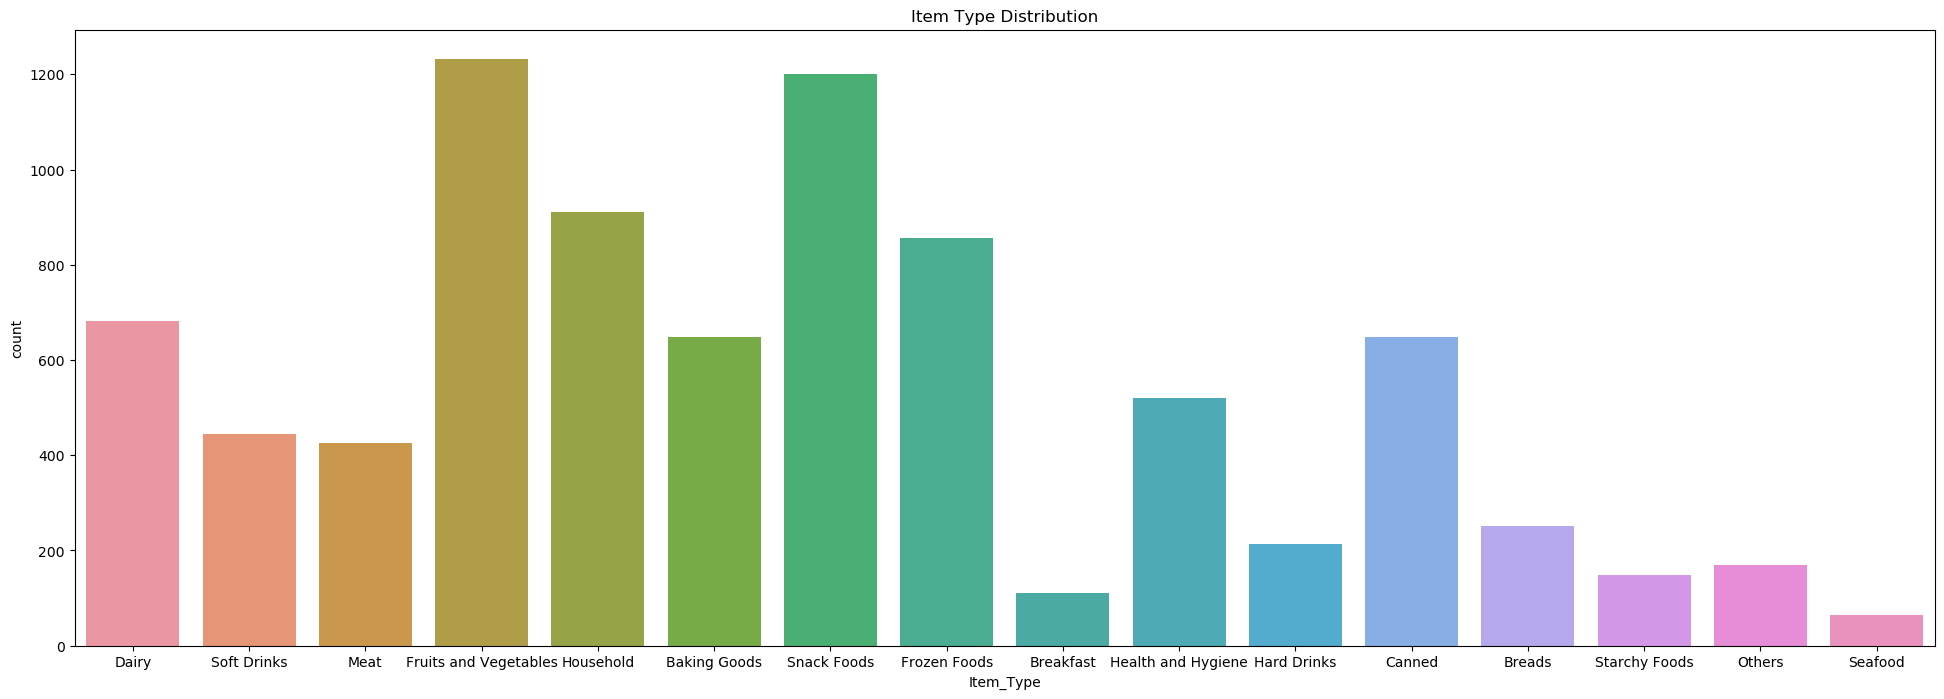

In [99]:
plt.figure(figsize=(24,8))
plt.title('Item Type Distribution')
sns.countplot(data = train, x='Item_Type')
plt.show()

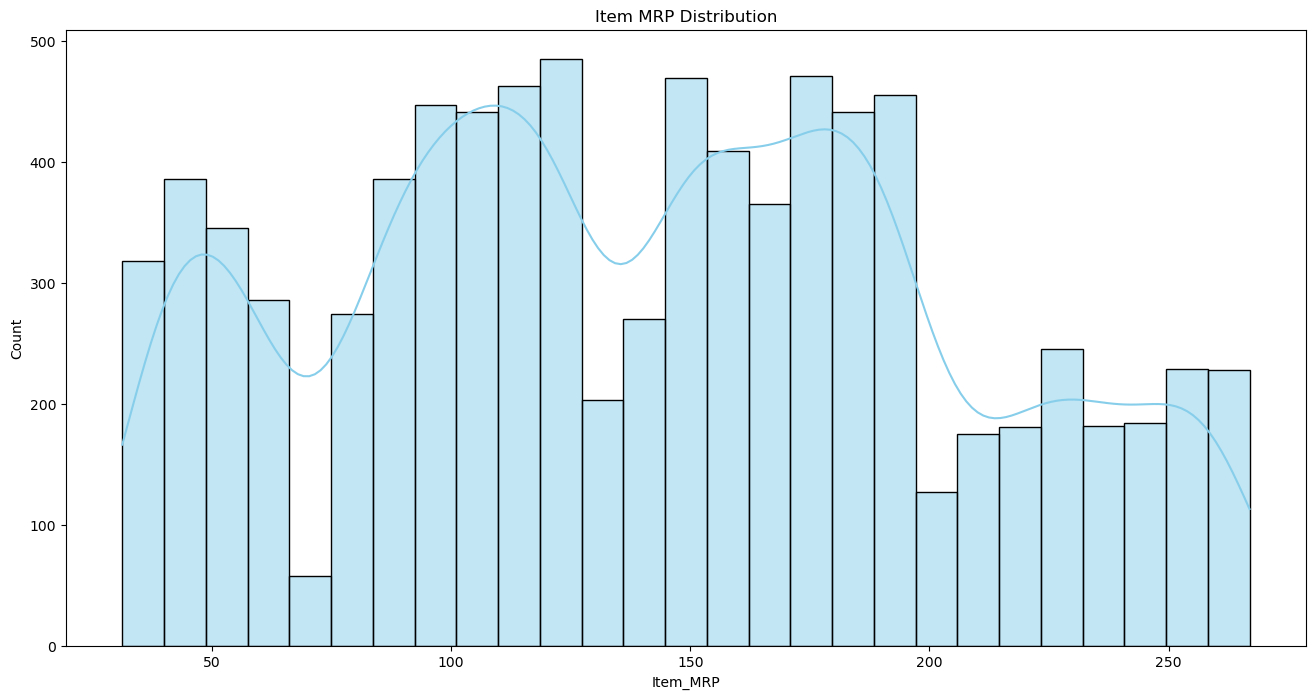

In [100]:
#Item MRPs
plt.figure(figsize=(16,8))
plt.title('Item MRP Distribution')
sns.histplot(data= train, x= 'Item_MRP',color='skyblue', kde=True)
plt.show()

# Model Train

In [101]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [102]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [103]:
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [104]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [105]:
train2 = train.copy()

In [106]:
train2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [114]:
train2['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x:x[0:2])
train2['Item_Type_Combined'] = train2['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [115]:
train2['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [119]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
dtypes: float64(4), int32(7), int64(1), object(1)
mem

In [108]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [120]:
for i in train2.columns:
    if train2[i].dtype == 'object':
        label_encoder = LabelEncoder()
        train2[i] = label_encoder.fit_transform(train2[i])

In [121]:
train2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,1
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,2
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,1


In [122]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [124]:
dummy = pd.get_dummies(train2[['Item_Type','Outlet_Identifier','Outlet_Type']])
train2 = train2.drop(['Item_Type','Outlet_Identifier','Outlet_Type'], axis=1)
train2 = pd.concat([train2, dummy],axis=1)

In [125]:
train2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Combined,Item_Type,Outlet_Identifier,Outlet_Type
0,156,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,1,4,9,1
1,8,5.920,1,0.019278,48.2692,2009,1,2,443.4228,0,14,3,2
2,662,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,1,10,9,1
3,1121,19.200,1,0.000000,182.0950,1998,1,2,732.3800,1,6,0,0
4,1297,8.930,0,0.000000,53.8614,1987,0,2,994.7052,2,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,214.5218,1987,0,2,2778.3834,1,13,1,1
8519,897,8.380,1,0.046982,108.1570,2002,1,1,549.2850,1,0,7,1
8520,1357,10.600,0,0.035186,85.1224,2004,2,1,1193.1136,2,8,6,1
8521,681,7.210,1,0.145221,103.1332,2009,1,2,1845.5976,1,13,3,2


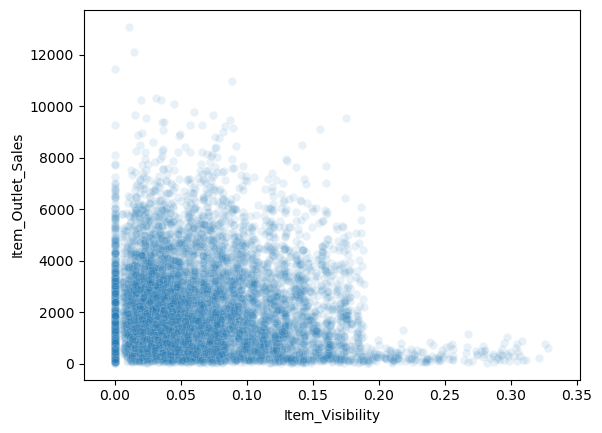

In [132]:
sns.scatterplot(x=train2['Item_Visibility'], y=train2['Item_Outlet_Sales'],alpha=0.1)
plt.show()

In [133]:
train3 = train2.copy()

In [134]:
train3.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [135]:
train3

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Combined,Item_Type,Outlet_Identifier,Outlet_Type
0,9.300,0,0.016047,249.8092,1,0,3735.1380,1,4,9,1
1,5.920,1,0.019278,48.2692,1,2,443.4228,0,14,3,2
2,17.500,0,0.016760,141.6180,1,0,2097.2700,1,10,9,1
3,19.200,1,0.000000,182.0950,1,2,732.3800,1,6,0,0
4,8.930,0,0.000000,53.8614,0,2,994.7052,2,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,2778.3834,1,13,1,1
8519,8.380,1,0.046982,108.1570,1,1,549.2850,1,0,7,1
8520,10.600,0,0.035186,85.1224,2,1,1193.1136,2,8,6,1
8521,7.210,1,0.145221,103.1332,1,2,1845.5976,1,13,3,2


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [141]:
#splitting the data
X = train3.drop(columns='Item_Outlet_Sales', axis=1)
y = train3['Item_Outlet_Sales']

In [142]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [144]:
print(X.shape,  X_train.shape, X_test.shape)

(8523, 10) (5966, 10) (2557, 10)


# Applying Models

### Linear Regression

In [145]:
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [146]:
linear_model.score(X_train, y_train)

0.5057288821682621

In [147]:
linear_model.score(X_test, y_test)

0.5206170408862434

In [154]:
!pip install xgboost

In [155]:
from xgboost import XGBRegressor

### XGBoost

In [156]:
#XGboost
XGmodel = XGBRegressor()

In [157]:
XGmodel.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [158]:
XGmodel.score(X_train, y_train)

0.8647213925929502

In [160]:
XGmodel.score(X_test,y_test)

0.5494880035447385

### Lasso

In [161]:
LassoModel = Lasso(alpha=0.1)
LassoModel.fit(X_train,y_train)

Lasso(alpha=0.1)

In [162]:
LassoModel.score(X_train,y_train)

0.5057288289290701

In [163]:
LassoModel.score(X_test, y_test)

0.5206237219194544

### Random Forrest

In [164]:
randForest = RandomForestRegressor(random_state=3)
randForest.fit(X_train,y_train)

RandomForestRegressor(random_state=3)

In [165]:
randForest.score(X_train,y_train)

0.9371079253242064

In [166]:
randForest.score(X_test, y_test)

0.566667335402999